Notebook to run code within Github repo. Use this notebook on Google Colab since it supports all the necessary dependencies and file formats. It clones the repo and calls the source code from there. 

In [ ]:
#code taken from https://github.com/deepmind/dm_control/blob/main/tutorial.ipynb
#@title Run to install MuJoCo and `dm_control`
import distutils.util
import subprocess
if subprocess.run('nvidia-smi').returncode:
  raise RuntimeError(
      'Cannot communicate with GPU. '
      'Make sure you are using a GPU Colab runtime. '
      'Go to the Runtime menu and select Choose runtime type.')

print('Installing dm_control...')
!pip install -q dm_control>=1.0.8

# Configure dm_control to use the EGL rendering backend (requires GPU)
%env MUJOCO_GL=egl
# %env MUJOCO_GL=osmesa

print('Checking that the dm_control installation succeeded...')
try:
  from dm_control import suite
  env = suite.load('cartpole', 'swingup')
  pixels = env.physics.render()
except Exception as e:
  raise e from RuntimeError(
      'Something went wrong during installation. Check the shell output above '
      'for more information.\n'
      'If using a hosted Colab runtime, make sure you enable GPU acceleration '
      'by going to the Runtime menu and selecting "Choose runtime type".')
else:
  del pixels, suite

!echo Installed dm_control $(pip show dm_control | grep -Po "(?<=Version: ).+")

#other dependencies
%pip install -q git+https://github.com/deepmind/acme.git#egg=dm-acme[jax,tf,envs]
%pip install -q imageio-ffmpeg
%pip install -q gdown
%pip install rsatoolbox
%pip install --upgrade numpy

import gdown
gdown.download("https://drive.google.com/file/d/13Xug1PoJ3bl3Ya9MTM0p-AR513mtsIVR/view?usp=share_link", fuzzy=True)

In [2]:
quit() # continue with the rest of the notebook after restarting the notebook

In [1]:
# command to delete cloned repo
# !rm -rf dsc_capstone_q1

In [2]:
!git clone https://github.com/danielcson/dsc_capstone_q1

Cloning into 'dsc_capstone_q1'...
remote: Enumerating objects: 534, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 534 (delta 53), reused 64 (delta 22), pack-reused 417
Receiving objects: 100% (534/534), 3.14 MiB | 15.70 MiB/s, done.
Resolving deltas: 100% (290/290), done.


In [5]:
# import functions from source code
from dsc_capstone_q1.src.visualization.visualize import plot_rsa_5a
from dsc_capstone_q1.src.visualization.visualize import plot_cka_5b
from dsc_capstone_q1.src.visualization.visualize import plot_cka_5c

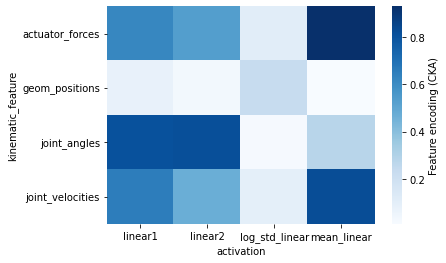

In [6]:
%matplotlib inline
plot_cka_5b()

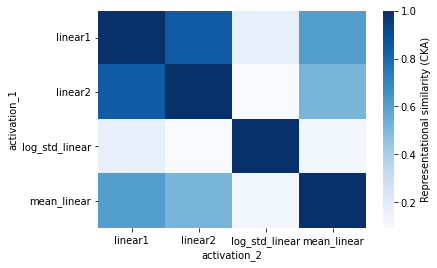

In [7]:
%matplotlib inline
plot_cka_5c()

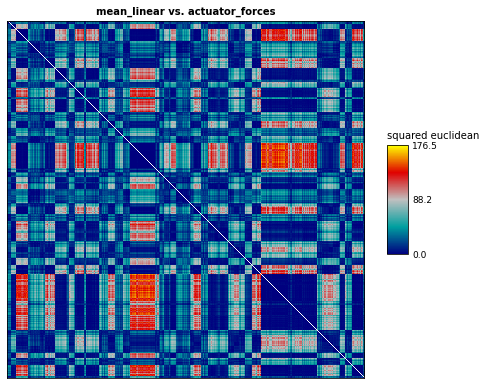

In [8]:
%matplotlib inline
plot_rsa_5a('mean_linear', 'actuator_forces')

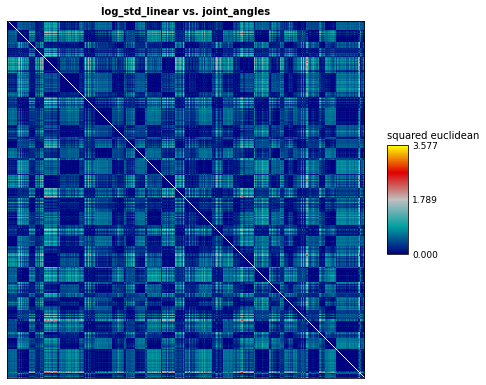

In [9]:
%matplotlib inline
plot_rsa_5a('log_std_linear', 'joint_angles')